In [ ]:
!pip install mlflow
!pip install tensorflow-addons

     |████████████████████████████████| 16.5 MB 8.6 MB/s 
     |████████████████████████████████| 146 kB 67.5 MB/s 
     |████████████████████████████████| 596 kB 29.1 MB/s 
     |████████████████████████████████| 79 kB 7.4 MB/s 
     |████████████████████████████████| 181 kB 67.8 MB/s 
     |████████████████████████████████| 210 kB 53.6 MB/s 
     |████████████████████████████████| 58 kB 7.0 MB/s 
     |████████████████████████████████| 54 kB 3.3 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
     |████████████████████████████████| 78 kB 4.2 MB/s 
  Created wheel for databricks-cli: filename=databricks_cli-0.16.4-py3-none-any.whl size=106877 sha256=b945ceef019c8d859781c2af581bbe74e9312b05cc7e6b78d9085c0b6c8ae8c5
  Stored in directory: /root/.cache/pip/wheels/a2/a1/6d/fa1d22ea25ed8593887437fe1c7e00f6ef307fc240ccd4dc5c
Successfully built databricks-cli
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfu

In [ ]:
## LIBRERIAS
from google.colab import drive, files
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras import Model, Sequential
from keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, BatchNormalization, Rescaling
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
import os
random.seed(1234)

In [ ]:
## Cargamos Drive e importamos las imágenes de train y test
drive.mount('/content/drive')
!unzip "/content/drive/MyDrive/Colab Notebooks/train.zip" -d "/content"
!unzip "/content/drive/MyDrive/Colab Notebooks/test.zip" -d "/content"

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: /content/train/28_CropBroadRain_jpeg/28_CropBroadRain_100.0__187_58.1_(-12.0834185497,-46.1504087324)_BR_Tocantins_Taguatinga_Taguatinga.jpg  
  inflating: /content/train/28_CropBroadRain_jpeg/28_CropBroadRain_100.0__188_60.1_(-12.1035408121,-46.2510200442)_BR_Tocantins_Taguatinga_Taguatinga.jpg  
  inflating: /content/train/28_CropBroadRain_jpeg/28_CropBroadRain_100.0__189_60.9_(-12.1035408121,-46.1504087324)_BR_Tocantins_Taguatinga_Taguatinga.jpg  
  inflating: /content/train/28_CropBroadRain_jpeg/28_CropBroadRain_100.0__191_59.5_(-12.1236630744,-46.2107755194)_BR_Tocantins_Taguatinga_Taguatinga.jpg  
  inflating: /content/train/28_CropBroadRain_jpeg/28_CropBroadRain_100.0__192_60.5_(-12.1236630744,-46.1302864701)_BR_Tocantins_Taguatinga_Taguatinga.jpg  
  inflating: /content/train/28_CropBroadRain_jpeg/28_CropBroadRain_100.0__193_53.4_(-12.1840298614,-46.3516313561)_BR_Tocantins_Taguatinga_Taguatinga.jpg  
  i

In [ ]:
## Renombramos las carpetas para que tf las lea en orden
dirnames = sorted(os.listdir("train"))
for dir in dirnames:
  newname = ""

  if (len(dir.split('_')[0]) == 1):
    newname = '0'+dir.split('_')[0]
  else:
    newname = dir.split('_')[0]

  os.rename("train/"+dir,"train/"+newname)

In [ ]:
## Leemos las imágenes de train, validacion y test
training = tf.keras.utils.image_dataset_from_directory(
  "train",
  validation_split=0.2,
  subset="training",
  seed=1234,
  image_size=(224, 224),
  batch_size = 32)

validation = tf.keras.utils.image_dataset_from_directory(
  "train",
  validation_split=0.2,
  subset="validation",
  seed=1234,
  image_size=(224, 224),
  batch_size = 32)

test = tf.keras.utils.image_dataset_from_directory(
  "test",
  shuffle=False,
  labels=None,
  image_size=(224, 224),
  batch_size = 32)


Found 10266 files belonging to 29 classes.
Using 8213 files for training.
Found 10266 files belonging to 29 classes.
Using 2053 files for validation.
Found 1618 files belonging to 1 classes.


In [ ]:
print(training.take(1))

<TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


tf.Tensor(
[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]], shape=(224, 224, 3), dtype=float32)
tf.Tensor(
[[[33. 51. 61.]
  [33. 51. 61.]
  [32. 51. 58.]
  ...
  [34. 51. 59.]
  [33. 50. 58.]
  [34. 51. 59.]]

 [[33. 51. 61.]
  [34. 52. 62.]
  [32. 51. 58.]
  ...
  [33. 50. 58.]
  [33. 50. 58.]
  [33. 50. 58

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


tf.Tensor(
[[[38. 55. 63.]
  [37. 54. 62.]
  [44. 57. 66.]
  ...
  [34. 51. 61.]
  [33. 50. 60.]
  [33. 50. 60.]]

 [[38. 55. 63.]
  [38. 55. 63.]
  [40. 54. 63.]
  ...
  [32. 49. 59.]
  [34. 51. 61.]
  [33. 50. 60.]]

 [[38. 57. 63.]
  [38. 57. 63.]
  [37. 54. 62.]
  ...
  [31. 50. 57.]
  [34. 53. 60.]
  [34. 53. 60.]]

 ...

 [[46. 59. 67.]
  [46. 59. 67.]
  [46. 59. 68.]
  ...
  [34. 51. 59.]
  [33. 52. 59.]
  [33. 52. 59.]]

 [[44. 58. 67.]
  [46. 60. 69.]
  [47. 60. 69.]
  ...
  [35. 52. 59.]
  [36. 53. 61.]
  [36. 53. 61.]]

 [[44. 58. 67.]
  [43. 57. 66.]
  [45. 58. 67.]
  ...
  [35. 52. 59.]
  [35. 52. 60.]
  [36. 53. 61.]]], shape=(224, 224, 3), dtype=float32)
tf.Tensor(
[[[ 80.  91.  97.]
  [ 75.  86.  90.]
  [ 75.  84.  89.]
  ...
  [ 67.  82.  87.]
  [ 69.  83.  92.]
  [ 70.  84.  93.]]

 [[ 83.  94.  98.]
  [ 80.  91.  95.]
  [ 76.  85.  90.]
  ...
  [ 68.  83.  90.]
  [ 67.  81.  90.]
  [ 70.  84.  93.]]

 [[ 82.  93.  95.]
  [ 80.  91.  93.]
  [ 78.  87.  92.]
  ...
  [ 

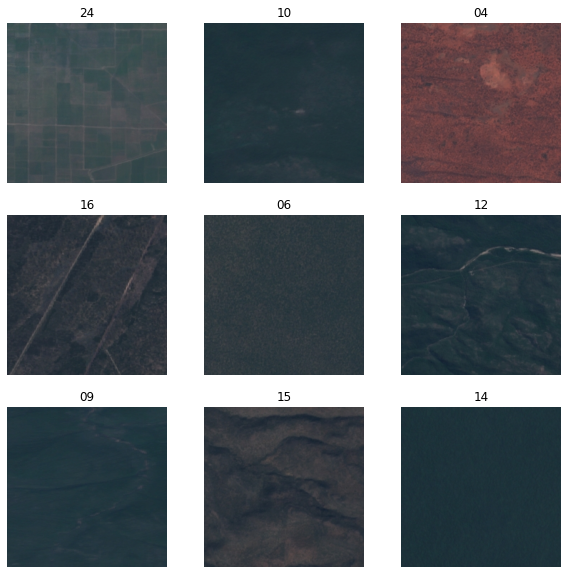

In [ ]:
## Mostramos las 9 primeras imagenes de training
class_names = training.class_names
plt.figure(figsize=(10, 10))
for images, labels in training.take(10):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
    print(images[i])

In [ ]:
## Función que muestra la evolución de las accuracy de train y validacion
## durante el entrenamiento.
def mostrarEvolucion(hist):

  loss = hist.history['loss']
  val_loss = hist.history['val_loss']
  plt.plot(loss)
  plt.plot(val_loss)
  plt.legend(['Training loss', 'Validation loss'])
  plt.show()

  acc = hist.history['accuracy']
  val_acc = hist.history['val_accuracy']
  plt.plot(acc)
  plt.plot(val_acc)
  plt.legend(['Training accuracy', 'Validation accuracy'])
  plt.show()


def predecir_guardar_test(modelo, nombre_salida, test):
    y_pred = modelo.predict(test)
    classes = np.argmax(y_pred, axis=1)
    classes = np.array(classes)
    classes = classes + 1

    d = {'id.jpg': sorted(os.listdir("test")), 'label': classes}
    df = pd.DataFrame(data=d)
    df.to_csv(nombre_salida, index=False)

In [ ]:
batch_size = 32

#No reescalo porque todas las imágenes están estandarizadas cogidas por el satélite
#Hay que centrarse en rotaciones, flips, nivel de zoom (el fenomeno puede tener mayor o menor amplitud)

datagen = ImageDataGenerator(horizontal_flip = True,
                                           vertical_flip = True,
                                           zoom_range = [0.75,1],
                                           validation_split = 0.2)

training_generator = datagen.flow_from_directory(
  "train",
  subset="training",
  seed=1234,
  target_size=(224, 224),
  batch_size = batch_size,
  class_mode='sparse')




Found 8236 images belonging to 29 classes.


In [ ]:
from mpl_toolkits.axes_grid1 import ImageGrid

def show_grid(image_list,nrows,ncols,label_list=None,show_labels=False,savename=None,figsize=(10,10),showaxis='off'):
    if type(image_list) is not list:
        if(image_list.shape[-1]==1):
            image_list = [image_list[i,:,:,0] for i in range(image_list.shape[0])]
        elif(image_list.shape[-1]==3):
            image_list = [image_list[i,:,:,:] for i in range(image_list.shape[0])]
    fig = plt.figure(None, figsize,frameon=False)
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(nrows, ncols),  # creates 2x2 grid of axes
                     axes_pad=0.3,  # pad between axes in inch.
                     share_all=True,
                     )
    for i in range(nrows*ncols):
        ax = grid[i]
        ax.imshow(image_list[i],cmap='Greys_r')  # The AxesGrid object work as a list of axes.
        ax.axis('off')
        if show_labels:
            ax.set_title(class_names[labels[i]])
    if savename != None:
        plt.savefig(savename,bbox_inches='tight')

In [ ]:
num_classes = 29
IMG_HEIGHT, IMG_WIDTH = 224,224

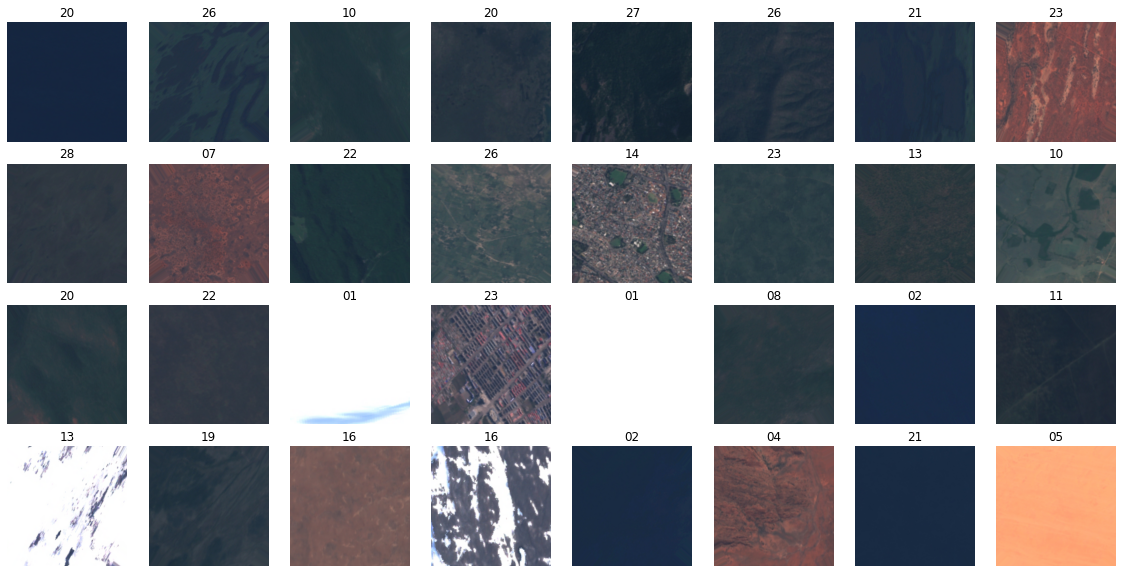

In [ ]:
x,y = next(training_generator)
show_grid(x,4,8,show_labels=True,figsize=(20,10))

In [ ]:
num_classes = 29
IMG_HEIGHT, IMG_WIDTH = 224,224
prediction_layer = Dense(num_classes, activation = "softmax")
model: tf.keras.Sequential = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(IMG_HEIGHT,IMG_WIDTH,3)),
  tf.keras.layers.Conv2D(16, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  prediction_layer
])

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(),
  metrics=['accuracy'])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)       

In [ ]:

mlflow.set_experiment("Baseline JH + dataaugmentation")
mlflow.tensorflow.autolog()

with mlflow.start_run():
  callback = EarlyStopping(patience=3,restore_best_weights=True)
  history = model.fit(training_generator,
                        epochs=50,
                        validation_data=validation_generator,
                        callbacks=callback)
mostrarEvolucion(history)

predecir_guardar_test(model, "modelo_propio_2.csv", test)

2022/03/14 19:41:56 INFO mlflow.tracking.fluent: Experiment with name 'Baseline JH + dataaugmentation' does not exist. Creating a new experiment.


Epoch 1/50
258/258 [==============================] - 138s 527ms/step - loss: 2.2998 - accuracy: 0.2644 - val_loss: 1.9862 - val_accuracy: 0.3468
Epoch 2/50
258/258 [==============================] - 132s 512ms/step - loss: 1.4801 - accuracy: 0.4916 - val_loss: 1.5085 - val_accuracy: 0.4926
Epoch 3/50
258/258 [==============================] - 132s 512ms/step - loss: 1.3380 - accuracy: 0.5321 - val_loss: 1.4327 - val_accuracy: 0.5478
Epoch 4/50
258/258 [==============================] - 132s 513ms/step - loss: 1.2260 - accuracy: 0.5747 - val_loss: 1.3643 - val_accuracy: 0.5655
Epoch 5/50
258/258 [==============================] - 132s 511ms/step - loss: 1.1852 - accuracy: 0.5875 - val_loss: 1.4627 - val_accuracy: 0.5488
Epoch 6/50
258/258 [==============================] - 132s 510ms/step - loss: 1.1740 - accuracy: 0.5872 - val_loss: 1.3834 - val_accuracy: 0.5586
Epoch 7/50
258/258 [==============================] - 133s 516ms/step - loss: 1.1001 - accuracy: 0.6083 - val_loss: 1.3214 -

2022/03/14 20:12:58 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during tensorflow autologging: 'EarlyStopping' object is not iterable


NameError: ignored

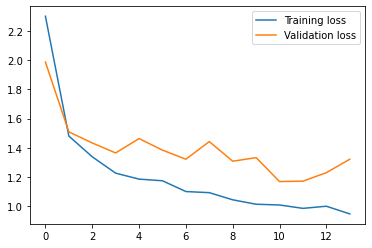

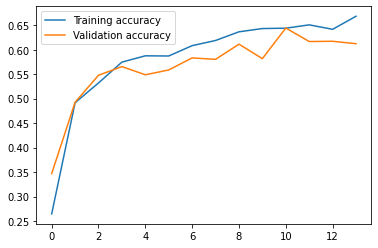

In [ ]:
mostrarEvolucion(history)

Teoría. Las features de las imágenes al ser cogidas desde el aire tiene sentido que tengan una ventana perceptiva mucho más grande. En ese sentido usar arquitecturas a los transformers puede ser interesante.

In [ ]:
training = tf.keras.utils.image_dataset_from_directory(
  "train",
  validation_split=0.2,
  subset="training",
  seed=1234,
  image_size=(224, 224),
  batch_size = 32)

validation = tf.keras.utils.image_dataset_from_directory(
  "train",
  validation_split=0.2,
  subset="validation",
  seed=1234,
  image_size=(224, 224),
  batch_size = 32)

test = tf.keras.utils.image_dataset_from_directory(
  "test",
  shuffle=False,
  labels=None,
  image_size=(224, 224),
  batch_size = 32)

Found 10266 files belonging to 29 classes.
Using 8213 files for training.
Found 10266 files belonging to 29 classes.
Using 2053 files for validation.
Found 1618 files belonging to 1 classes.


In [ ]:
import tensorflow as tf 


import tensorflow_hub as hub
num_classes = 29
resnet_remote_sensing = hub.KerasLayer("https://tfhub.dev/google/remote_sensing/bigearthnet-resnet50/1",
                                   trainable=True)

num_classes = 29
IMG_HEIGHT, IMG_WIDTH = 224,224

resnet_remote_sensing.trainable = False
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(IMG_HEIGHT,IMG_WIDTH,3)),
    resnet_remote_sensing,
    BatchNormalization()
    tf.keras.layers.Dense(256,activation='relu'),

    tf.keras.layers.Dense(num_classes, kernel_initializer='zeros')
])

# Define optimiser and loss
 
# Decay learning rate by factor of 10 at SCHEDULE_BOUNDARIES.
lr = 0.003
SCHEDULE_BOUNDARIES = [5000,10000, 15000]
lr_schedule = tf.keras.optimizers.schedules.PiecewiseConstantDecay(boundaries=SCHEDULE_BOUNDARIES,
                                                                  values=[lr, lr*0.1, lr*0.001, lr*0.0001])
optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.9)

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer,
             loss=loss_fn,
             metrics=['accuracy'])

model.build()

model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_14 (Rescaling)    (None, 224, 224, 3)       0         
                                                                 
 keras_layer_21 (KerasLayer)  (None, 2048)             23633899  
                                                                 
 dense_48 (Dense)            (None, 256)               524544    
                                                                 
 dense_49 (Dense)            (None, 29)                7453      
                                                                 
Total params: 24,165,896
Trainable params: 531,997
Non-trainable params: 23,633,899
_________________________________________________________________


In [ ]:
callback = EarlyStopping(patience=3,restore_best_weights=True)
history = model.fit(
   training,
   batch_size=32,
   epochs=20,
   callbacks=callback,
   validation_data=validation)




Epoch 1/20
257/257 [==============================] - 105s 284ms/step - loss: 2.4308 - accuracy: 0.3776 - val_loss: 1.4770 - val_accuracy: 0.6201
Epoch 2/20
257/257 [==============================] - 72s 280ms/step - loss: 1.1803 - accuracy: 0.6468 - val_loss: 1.0257 - val_accuracy: 0.6780
Epoch 3/20
257/257 [==============================] - 72s 280ms/step - loss: 0.9098 - accuracy: 0.7108 - val_loss: 0.8549 - val_accuracy: 0.7350
Epoch 4/20
257/257 [==============================] - 72s 279ms/step - loss: 0.7736 - accuracy: 0.7453 - val_loss: 0.7711 - val_accuracy: 0.7511
Epoch 5/20
257/257 [==============================] - 72s 278ms/step - loss: 0.6945 - accuracy: 0.7690 - val_loss: 0.7288 - val_accuracy: 0.7516
Epoch 6/20
257/257 [==============================] - 72s 279ms/step - loss: 0.6378 - accuracy: 0.7833 - val_loss: 0.6906 - val_accuracy: 0.7662
Epoch 7/20
257/257 [==============================] - 72s 278ms/step - loss: 0.5920 - accuracy: 0.8013 - val_loss: 0.6475 - val_a

UnimplementedError: ignored

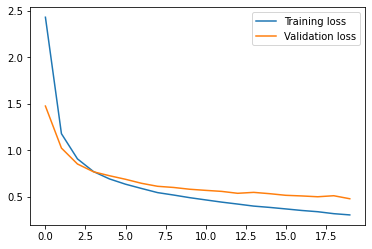

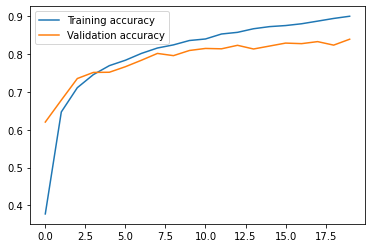

In [ ]:
mostrarEvolucion(history)

In [ ]:
export_module_dir = '/content/drive/myDrive/'
!mkdir /content/model_ft_freeze
model.save('/content/model_ft_freeze')

INFO:tensorflow:Assets written to: /content/model_ft_freeze/assets


INFO:tensorflow:Assets written to: /content/model_ft_freeze/assets


In [ ]:
model_trained = tf.keras.models.load_model('/content/drive/MyDrive/model_ft_freeze')

In [ ]:


model_trained.layers[1].trainable = True
model_trained.build()

model_trained.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_14 (Rescaling)    (None, 224, 224, 3)       0         
                                                                 
 keras_layer_21 (KerasLayer)  (None, 2048)             23633899  
                                                                 
 dense_48 (Dense)            (None, 256)               524544    
                                                                 
 dense_49 (Dense)            (None, 29)                7453      
                                                                 
Total params: 24,165,896
Trainable params: 24,120,456
Non-trainable params: 45,440
_________________________________________________________________


In [ ]:
callback = EarlyStopping(patience=3,restore_best_weights=True)
history = model_trained.fit(
   training,
   batch_size=32,
   epochs=30,
   callbacks=callback,
   validation_data=validation)

Epoch 1/30
257/257 [==============================] - 35s 124ms/step - loss: 0.3025 - accuracy: 0.9005 - val_loss: 0.5085 - val_accuracy: 0.8295
Epoch 2/30
257/257 [==============================] - 31s 120ms/step - loss: 0.2918 - accuracy: 0.9081 - val_loss: 0.4873 - val_accuracy: 0.8388
Epoch 3/30
257/257 [==============================] - 31s 120ms/step - loss: 0.2814 - accuracy: 0.9115 - val_loss: 0.4851 - val_accuracy: 0.8359
Epoch 4/30
257/257 [==============================] - 31s 120ms/step - loss: 0.2700 - accuracy: 0.9132 - val_loss: 0.4899 - val_accuracy: 0.8339
Epoch 5/30
257/257 [==============================] - 31s 121ms/step - loss: 0.2602 - accuracy: 0.9178 - val_loss: 0.4859 - val_accuracy: 0.8393
Epoch 6/30
257/257 [==============================] - 32s 122ms/step - loss: 0.2484 - accuracy: 0.9218 - val_loss: 0.4810 - val_accuracy: 0.8349
Epoch 7/30
257/257 [==============================] - 31s 122ms/step - loss: 0.2392 - accuracy: 0.9267 - val_loss: 0.4845 - val_ac

In [ ]:
predecir_guardar_test(model_trained,'./FineTuningResnet.csv', test)